Câu 17: Giả sử có 100 đoạn đường với 4 trạng thái: (1: Tốt, 2: Khá, 3: Trung Bình, 4: Xấu)
Năm hiện tại là 2007 với vectơ trạng thái:
 pi = (0.45, 0.32, 0.16, 0.07)

Dựa vào dữ liệu năm 2006 và 2007, ma trận chuyển trạng thái $P$ của các đoạn đường là:

P = \begin{pmatrix}
0.82 & 0.18 & 0 & 0 \\
0 & 0.73 & 0.27 & 0 \\
0 & 0 & 0.67 & 0.33 \\
0 & 0 & 0 & 1
\end{pmatrix}

Giả sử xác suất thay đổi trạng thái của các đoạn đường là không đổi theo các năm. Dự đoán sự xuống cấp của 100 đoạn đường trong các năm tiếp theo.


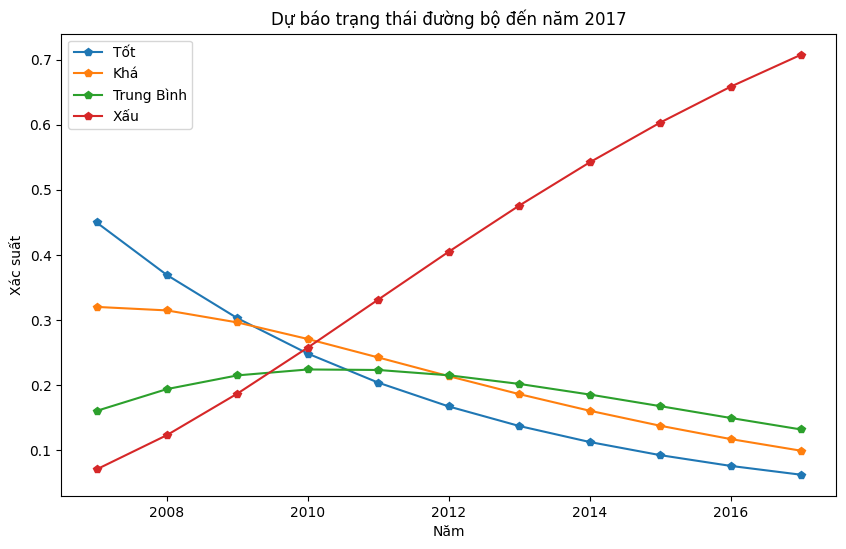

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pi = np.array([0.45, 0.32, 0.16, 0.07])
p = np.array([
    [0.82, 0.18, 0.00, 0.00],
    [0.00, 0.73, 0.27, 0.00],
    [0.00, 0.00, 0.67, 0.33],
    [0.00, 0.00, 0.00, 1.00]
])
SoNamDuBao = 10
TrangThai = [pi]
for i in range(SoNamDuBao):
  pi = np.dot(pi, p)
  TrangThai.append(pi)
TrangThai = np.array(TrangThai)
years = np.arange(2007, 2007 + SoNamDuBao + 1)
lables = ['Tốt', 'Khá', 'Trung Bình', 'Xấu']
plt.figure(figsize=(10, 6))
for i in range(4):
  plt.plot(years, TrangThai[:, i], marker = 'p', label=lables[i])
plt.legend()
plt.xlabel('Năm')
plt.ylabel('Xác suất')
plt.title('Dự báo trạng thái đường bộ đến năm 2017')
plt.show()

Câu 18: Viết chương trình python tính trung bình theo thời gian, trung bình theo xác suất của một quá trình ngẫu nhiên. Áp dụng vào một QTNN cụ thể (lấy QTNN trong phần lý thuyết để trình bày).
Một quá trình ngẫu nhiên ergodic là quá trình mà các đặc trưng thống kê như trung bình, phương sai... tính theo thời gian trên một mẫu duy nhất sẽ tiệm cận với trung bình xác suất (ensemble average) khi thời gian đủ dài.

**Ví dụ:**
Xét quá trình tín hiệu ngẫu nhiên ergodic:
$$
X(t) = A \cos(\omega t + \Phi)
$$
trong đó:
- $A, \omega$ là hằng số,
- $\Phi$ là biến ngẫu nhiên phân bố đều trên $[0, 2\pi)$.

**Đặc điểm:**  
Quá trình này là ergodic với trung bình, nghĩa là trung bình theo thời gian của một mẫu sẽ gần đúng với trung bình xác suất của toàn quá trình.

Trung bình theo thời gian:
$$
\overline{X} = \lim_{T \to \infty} \frac{1}{T} \int_0^T X(t) dt
$$

Trung bình theo xác suất (ensemble):
$$
E[X] = \int_{0}^{2\pi} X(t) p(\Phi) d\Phi
$$
với $p(\Phi) = \frac{1}{2\pi}$ là mật độ xác suất đều của $\Phi$.


In [ ]:
from scipy.stats import uniform
A = 10
w = 1/2
T = 100
n = 1000
dt = T/n
t = np.linspace(0, T, n)
phi = uniform.rvs(0, 2*np.pi, n)
X = A * np.cos(w * t[np.newaxis,:] + phi[:, np.newaxis] )
mean_time = np.mean(np.mean(X, axis=1)) #lấy trung bình trên 1 mẫu rồi trung bình toàn bộ
mean_prob = np.mean(np.mean(X, axis=0)) #lấy trung bình trên mọi thời điểm rồi lấy trung bình theo thời gian
print(mean_time)
print(mean_prob)


0.0005668878503250999
0.0005668878503251033


Một thí nghiệm được tiến hành nhằm đánh giá hiệu quả của một phương pháp điều trị sán dây trong dạ dày của cừu. Một mẫu ngẫu nhiên gồm 24 con cừu non bị nhiễm sán dây, có độ tuổi và tình trạng sức khỏe tương đương nhau, được chia ngẫu nhiên thành hai nhóm.

Mười hai con được tiêm thuốc điều trị,
Mười hai con còn lại được giữ nguyên, không điều trị.

Sau 6 tháng, các con cừu được mổ để kiểm tra, và số lượng sán dây trong dạ dày được ghi nhận như sau:

Cừu được điều trị bằng thuốc (nhóm 1):
18, 43, 28, 50, 16, 32, 13, 35, 38, 33, 6, 7

Cừu không được điều trị (nhóm 2):
40, 54, 26, 63, 21, 37, 39, 23, 48, 58, 28, 39

Yêu cầu:

a. Kiểm định xem liệu số lượng sán dây trung bình trong dạ dày của nhóm cừu được điều trị có nhỏ hơn trung bình của nhóm không điều trị hay không, với mức ý nghĩa $\alpha = 0,05$.

b. Xác định mức ý nghĩa, hay $p\text{-value}$ của phép kiểm định trên.
Ghi chú: $p\text{-value} = P(Y>t) = 1 - p.norm(t)$, $t$= thống kê của phép kiểm định.

c. Xây dựng khoảng tin cậy 95% cho $(\mu_1 - \mu_2)$ để đánh giá mức độ khác biệt giữa hai giá trị trung bình.

In [1]:
import numpy as np
from scipy import stats
import math

In [2]:
NhomDieuTri = np.array([18, 43, 28, 50, 16, 32, 13, 35, 38, 33, 6, 7])
NhomKhongDieuTri = np.array([40, 54, 26, 63, 21, 37, 39, 23, 48, 58, 28, 39])

In [3]:
n1, n2 = len(NhomDieuTri), len(NhomKhongDieuTri)
mean1, mean2 = np.mean(NhomDieuTri), np.mean(NhomKhongDieuTri)
std1, std2 = np.std(NhomDieuTri, ddof=1), np.std(NhomKhongDieuTri, ddof=1)

print(f"Nhóm điều trị: Mean = {mean1:.4f}, Std = {std1:.4f}, n = {n1}")
print(f"Nhóm không điều trị: Mean = {mean2:.4f}, Std = {std2:.4f}, n = {n2}")

Nhóm điều trị: Mean = 26.5833, Std = 14.3619, n = 12
Nhóm không điều trị: Mean = 39.6667, Std = 13.8586, n = 12


a. Kiểm định xem liệu số lượng sán dây trung bình trong dạ dày của nhóm cừu được điều trị có nhỏ hơn trung bình của nhóm không điều trị hay không, với mức ý nghĩa $\alpha = 0,05$.

In [4]:
alpha = 0.5
# H0: mu1 = mu2
# H1: mu1 < mu2 (Kiểm định phía TRÁI)
alpha = 0.05
stat_lev, p_lev = stats.levene(NhomDieuTri,NhomKhongDieuTri)
equal_var = p_lev > 0.05
if equal_var:
  print("Phương sai đồng nhất")
else:
  print("Phương sai không đồng nhất")

Phương sai đồng nhất


In [7]:
if equal_var:
    # Phương sai đồng nhất
    df = n1 + n2 - 2
    pooled_var = ((n1 - 1)*std1**2 + (n2 - 1)*std2**2) / df
    se = math.sqrt(pooled_var * (1/n1 + 1/n2))
else:
    # Phương sai không đồng nhất
    se = math.sqrt(std1**2/n1 + std2**2/n2)
    df = (std1**2/n1 + std2**2/n2)**2 / ((std1**2/n1)**2/(n1-1) + (std2**2/n2)**2/(n2-1))
t_stat = (mean1 - mean2) / se
t_critical = stats.t.ppf(alpha, df)
if t_stat < t_critical:
  print("Bác bỏ H0")
else:
  print("Chưa đủ cơ sở để bác bỏ H0")

Bác bỏ H0


b. Xác định mức ý nghĩa, hay $p\text{-value}$ của phép kiểm định trên.

Ghi chú: $p\text{-value} = P(Y>t) = 1 - p.norm(t)$, $t$= thống kê của phép kiểm định.

In [8]:
p_vl = stats.t.cdf(t_stat, df)
if p_vl < alpha:
  print("Kết quả có ý nghĩa kiểm định")
else:
  print("Kết quả không có ý nghĩa kiểm định")

Kết quả có ý nghĩa kiểm định


c. Xây dựng khoảng tin cậy 95% cho $(\mu_1 - \mu_2)$ để đánh giá mức độ khác biệt giữa hai giá trị trung bình.

In [9]:
conf_level = 0.95
alpha = 1 - conf_level

# Giá trị t tới hạn cho khoảng tin cậy (chia đôi alpha)
t_critical = stats.t.ppf(1 - alpha/2, df)
SaiSoBien = t_critical * se

diff = mean1 - mean2
lower = diff - SaiSoBien
upper = diff + SaiSoBien

print(f"Hiệu trung bình mẫu: {diff:.4f}")
print(f"Khoảng tin cậy 95%: ({lower:.4f}, {upper:.4f})")

Hiệu trung bình mẫu: -13.0833
Khoảng tin cậy 95%: (-25.0318, -1.1349)
